# Introduction

This is a revamp of my original Titanic notebook which I created many years ago. 

https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

# Importing packages

Let's start by importing all necessary packages:

In [1]:
# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Tools
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2


## Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


# Loading data

We will now load the data. The training data is stored into the df variable, while the test set is saved to df_test. The test test will be used to make predictions for the competition.

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

# Data description:

**Survival** - Survival (0 = No; 1 = Yes). Not included in test.csv file.

**Pclass** - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

**Name** - Name

**Sex** - Sex

**Age** - Age

**Sibsp** - Number of Siblings/Spouses Aboard

**Parch** - Number of Parents/Children Aboard

**Ticket** - Ticket Number

**Fare** - Passenger Fare

**Cabin** - Cabin

**Embarked** - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
#df = df.set_index('PassengerId')

# Exploratory Data Analysis (EDA)

In [6]:
df.shape

(891, 12)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Most features have complete data, except for Age and Cabin. We should remember this so we can 

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In the case of the test dataset, we have missing values for the Age, Fare and Cabin features.

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:>

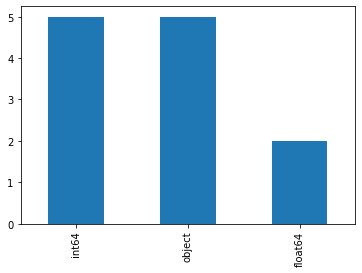

In [11]:
df.dtypes.value_counts().plot.bar()

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In the case of the test dataset, Age, Cabin, and Fare have missing values.

# Visualisations

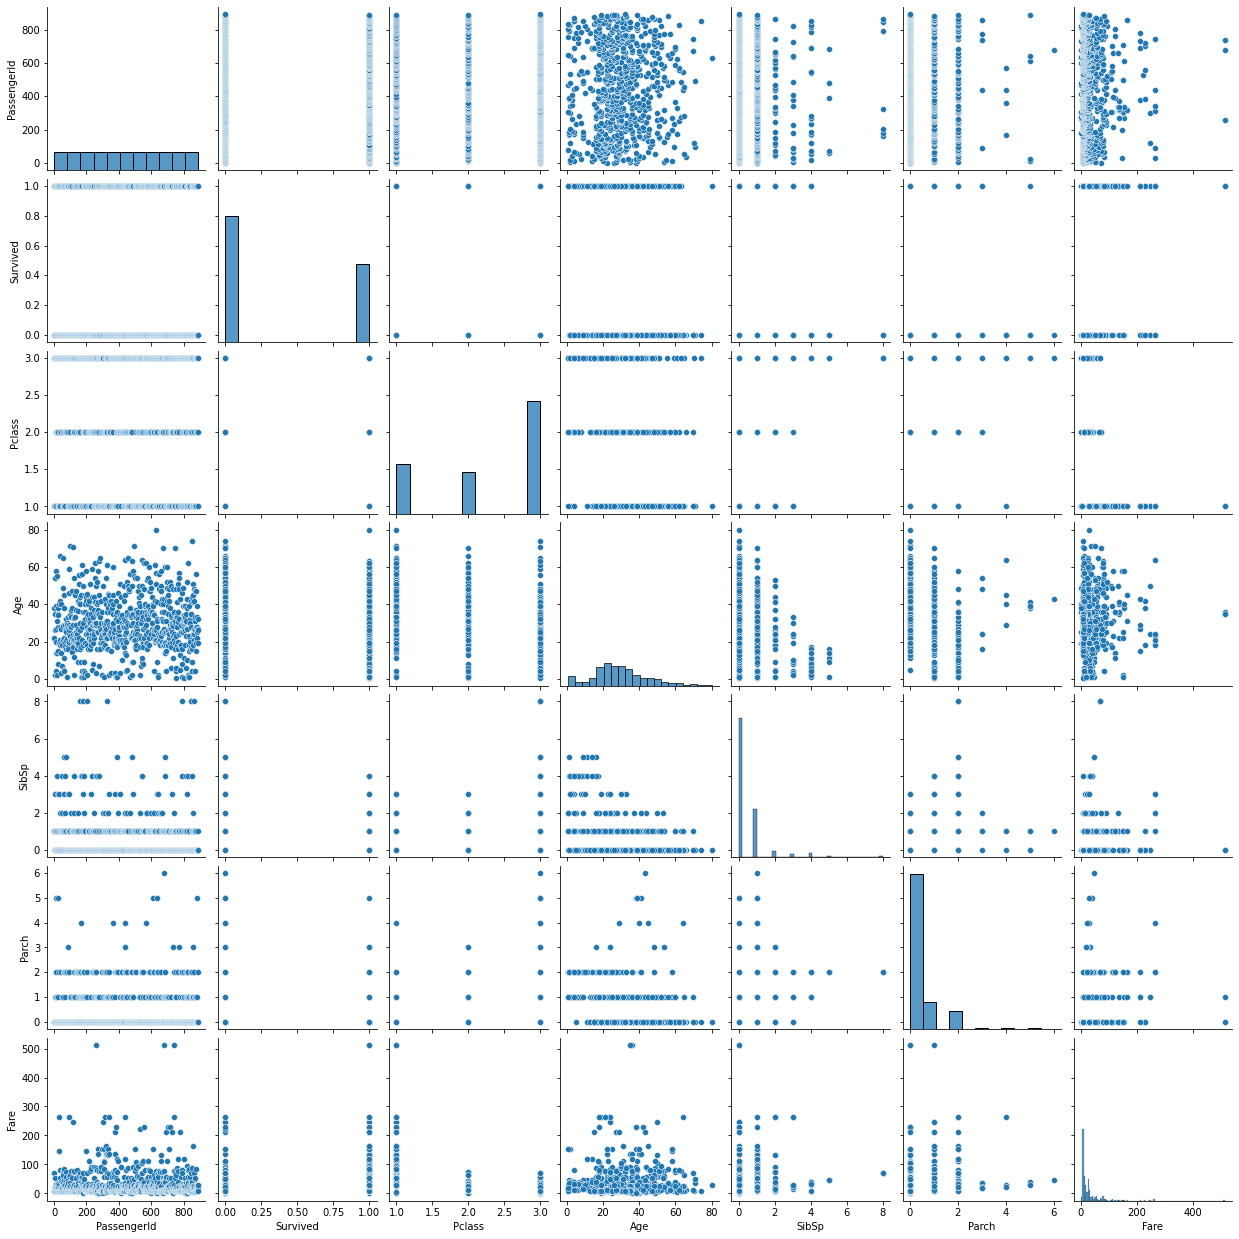

In [14]:
sns.pairplot(df)

### Age

<AxesSubplot:xlabel='Survived', ylabel='Age'>

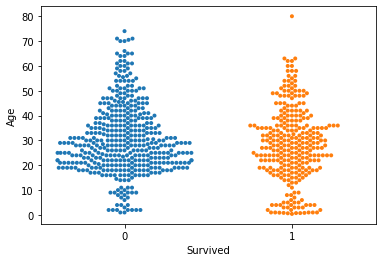

In [15]:
sns.swarmplot(x='Survived', y='Age', data=df, size=4)

It seems clear to me that there are relatively many 20-30 year olds that have not survived.

In [16]:
df[['Age', 'Survived']].groupby(['Survived'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Survived,Age
1,1,28.343690
0,0,30.626179


### Class

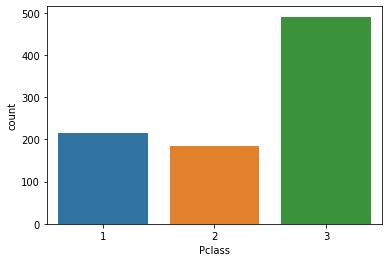

In [17]:
plt.figure()
sns.countplot(x= df['Pclass'])
plt.show()

The majority of passenges travels third class.

Female first class passengers have the highest survival rate. Male third class passengers have a very low surival rate.

In [18]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Lower classes definately seem to have a lower surivival rate.

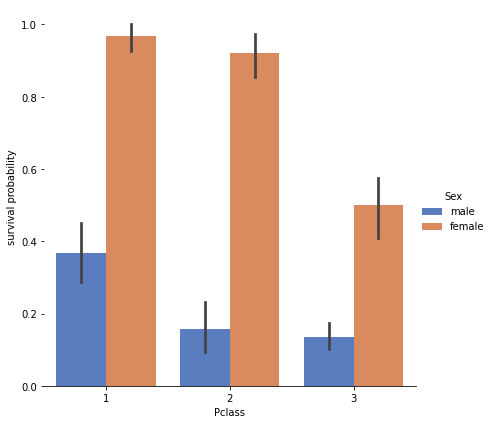

In [19]:
# Explore Pclass vs Survived by Sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

### Sex

In [20]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Female survival chance is much higher

### Family

In [21]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Having more siblings/spouses on board seems to decrease survival rate.

In [22]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch', ascending=True)

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


As before, more parents and chilren on board seems to decrease survival rates, although "single" passengersalso do not do well.

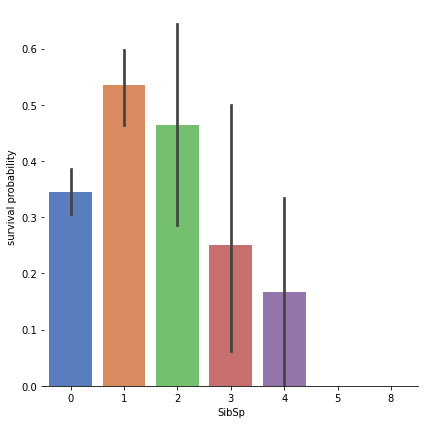

In [23]:
# Explore SibSp feature vs Survived
g = sns.catplot(x="SibSp",y="Survived",data=df,kind="bar", height= 6, 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

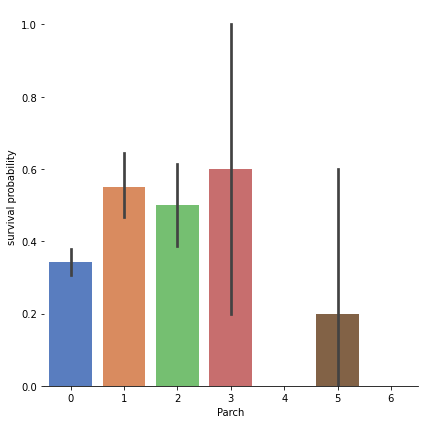

In [24]:
# Explore Parch feature vs Survived
g  = sns.catplot(x="Parch",y="Survived",data=df,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

### Age

<Figure size 720x576 with 0 Axes>

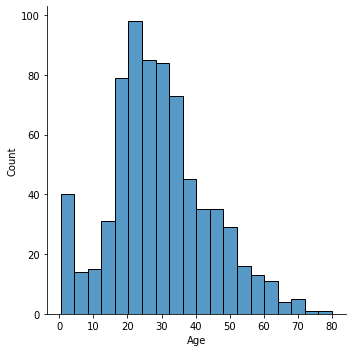

In [25]:
plt.figure(figsize = (10,8))
sns.displot(df['Age'], label = 'Age')
plt.show()

<Figure size 720x576 with 0 Axes>

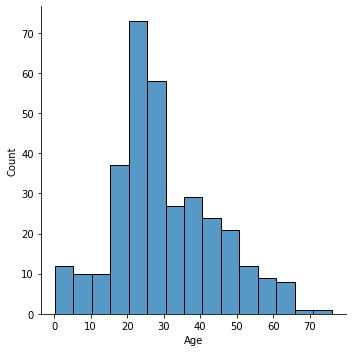

In [26]:
plt.figure(figsize = (10,8))
sns.displot(df_test['Age'], label = 'Age')
plt.show()

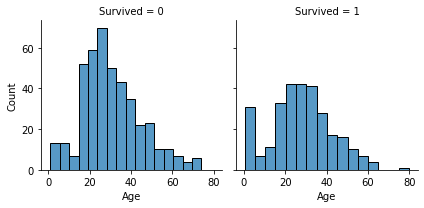

In [27]:
# Explore Age vs Survived
g = sns.FacetGrid(df, col='Survived')
g = g.map(sns.histplot, "Age")

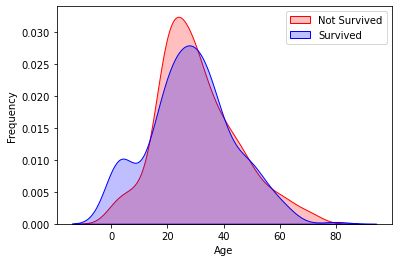

In [28]:
# Explore Age distibution 
g = sns.kdeplot(df["Age"][(df["Survived"] == 0) & (df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["Age"][(df["Survived"] == 1) & (df["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

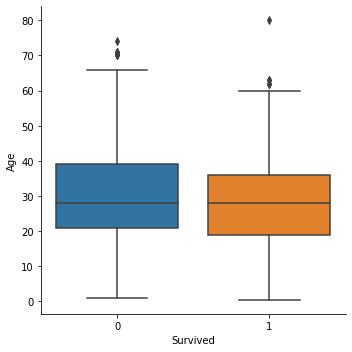

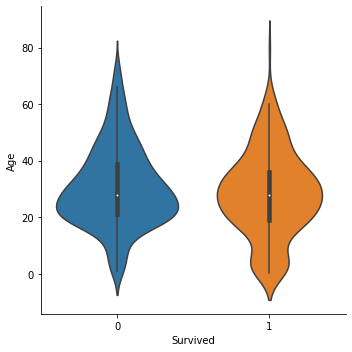

In [29]:
g = sns.catplot(x="Survived", y = "Age",data = df, kind="box")
g = sns.catplot(x="Survived", y = "Age",data = df, kind="violin")

### Embarked

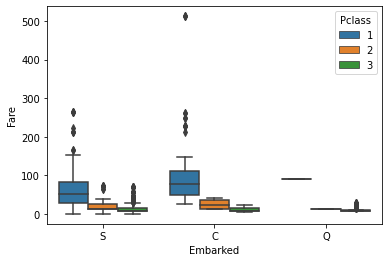

In [30]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df);

<AxesSubplot:>

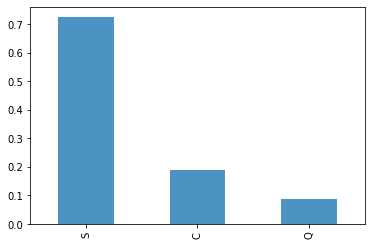

In [31]:
df.Embarked.value_counts(normalize=True).plot(kind="bar", alpha = 0.8)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

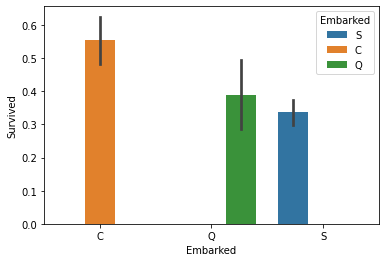

In [32]:
sns.barplot(x = 'Embarked', y = 'Survived', hue = 'Embarked', data = df,
            order = ['C', 'Q', 'S'])

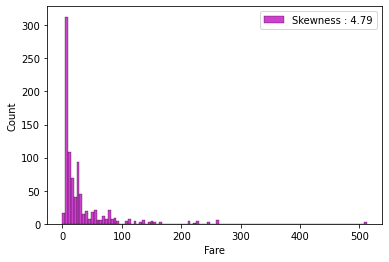

In [33]:
g = sns.histplot(df["Fare"], color="m", label="Skewness : %.2f"%(df["Fare"].skew()))
g = g.legend(loc="best")

# Correlations

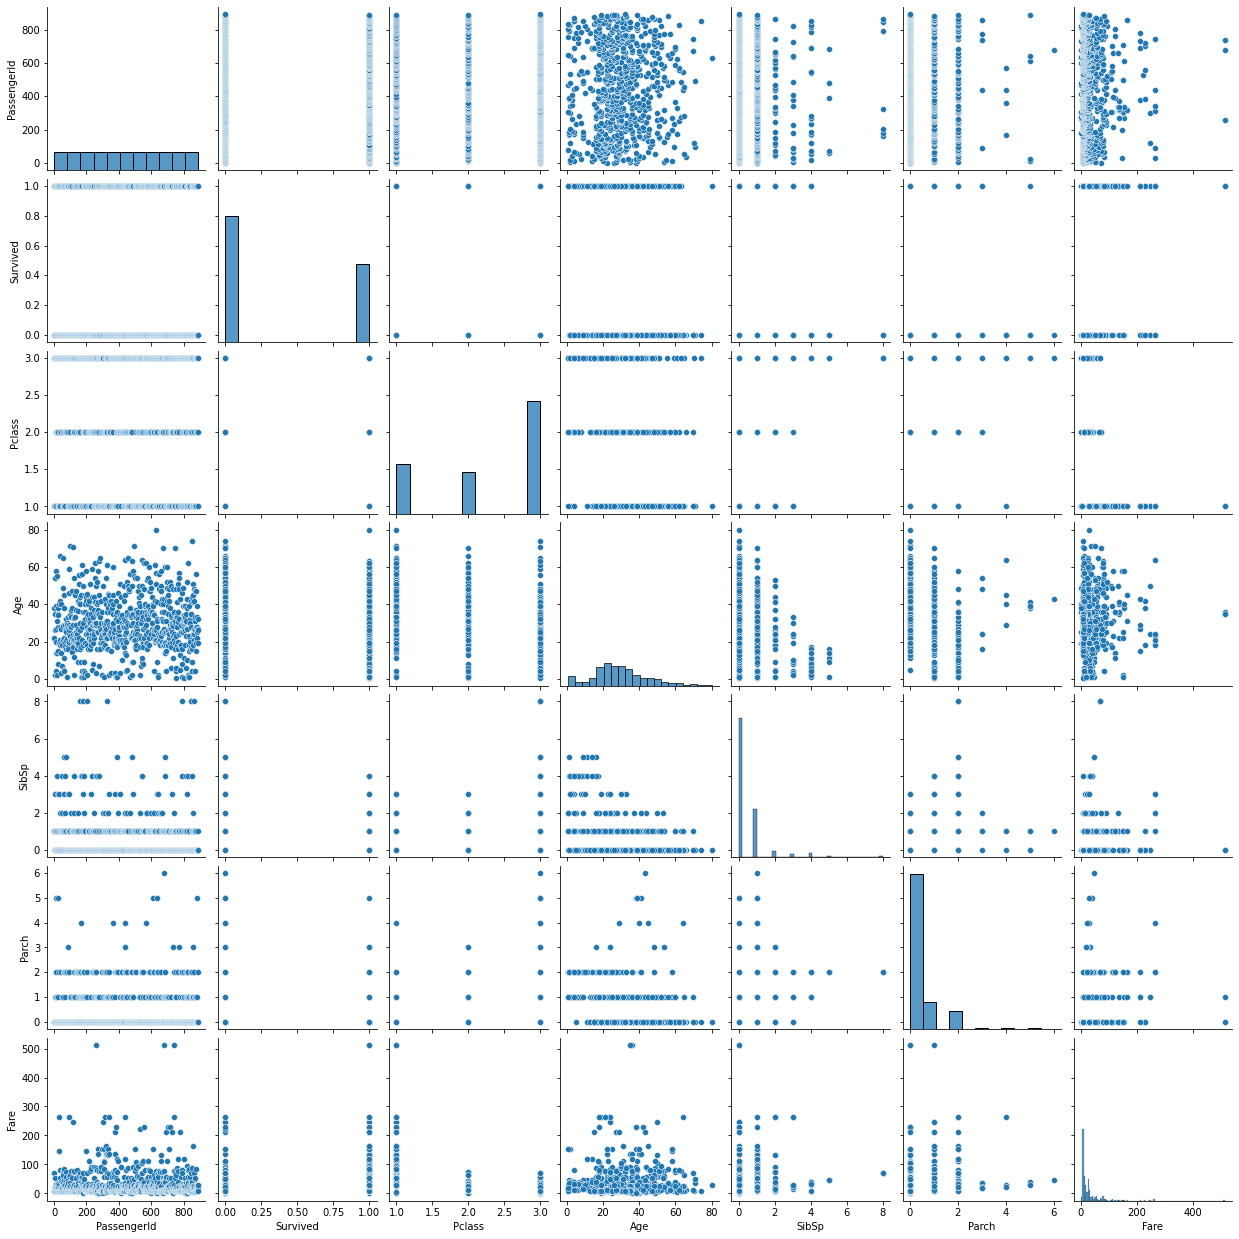

In [34]:
sns.pairplot(df)

<AxesSubplot:>

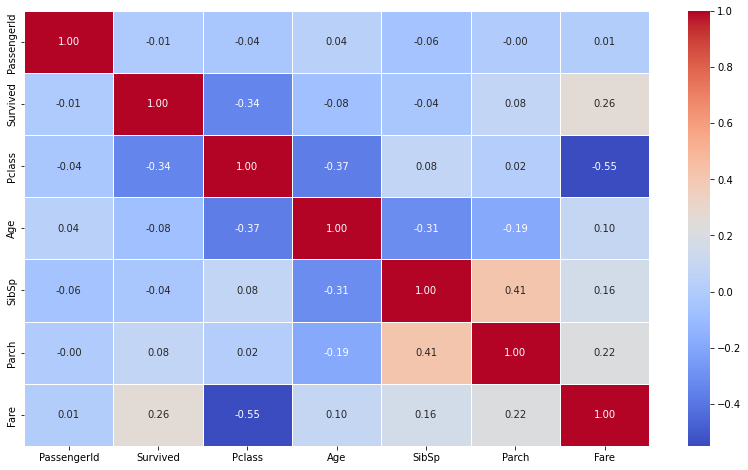

In [35]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), linewidths = 0.5, annot = True, fmt = ".2f", cmap = "coolwarm")

In [36]:
df.corr()["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [37]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [38]:
df.Cabin.str[0].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

# Feature Engineering

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df, df.Survived, test_size=0.1, random_state=5)

In [40]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C


In [41]:
def processData(df):

    df['Sex'] = df['Sex'].apply(lambda r: 0 if r == 'male' else 1).astype('int')
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    
    df['AgeBand'] = pd.cut(df['Age'], 5)
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age'] = 4
    
    # Create new feature of family size
    df["FamilySize"] = df['SibSp'] + df['Parch']
    
    df['Single'] = df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    df['Pair'] = df['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
    df['SmallF'] = df['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 <= 5 else 0)
    df['LargeF'] = df['FamilySize'].map(lambda s: 1 if s >= 6 else 0)
    
    df['HasBoardedSiblingsOrSpouses'] = df['SibSp'] >= 1
    df['HasBoardedParentsChildren'] = df['Parch'] >= 1
    
    df['isChild'] = df['Age'] < 18
    df['YoungAdults'] = (df['Age'] >= 18) & (df['Age'] <= 30)
    df['isSenior'] = df['Age'] > 65
    
    df.HasBoardedSiblingsOrSpouses = df.HasBoardedSiblingsOrSpouses.replace({True: 1, False: 0})
    df.HasBoardedParentsChildren = df.HasBoardedParentsChildren.replace({True: 1, False: 0})
    df.isChild = df.isChild.replace({True: 1, False: 0})
    df.YoungAdults = df.YoungAdults.replace({True: 1, False: 0})
    df.isSenior = df.isSenior.replace({True: 1, False: 0})
    
    df['Deck'] = df['Cabin'].str[0]
    df['Deck'] = df['Deck'].fillna("Unknown")
    
    # Fill empty Embarked values with most common value
    df['Embarked'] = df['Embarked'].fillna('C')
    
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme', 'Mrs'], 'Miss')
    
    df = df.set_index('PassengerId', drop=False)
    
    df = df.drop(['Ticket', 'Cabin', 'Name', 'SibSp', 'Parch', 'FamilySize'], axis=1)
    
    


    return df

In [42]:
X_train = processData(X_train)
X_val = processData(X_val)
df_test = processData(df_test)

In [43]:
    scaler = StandardScaler()
    X_train.Age = scaler.fit_transform(X_train.Age.values.reshape(-1,1))
    df_test.Age = scaler.transform(df_test.Age.values.reshape(-1,1))

In [44]:
X_train.Fare = X_train.Fare.apply(lambda l: np.log(l+1))
df_test.Fare = df_test.Fare.apply(lambda l: np.log(l+1))

In [45]:
X_train.Fare = scaler.fit_transform(X_train.Fare.values.reshape(-1,1))
df_test.Fare = scaler.transform(df_test.Fare.values.reshape(-1,1))

In [46]:
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,AgeBand,Single,Pair,SmallF,LargeF,HasBoardedSiblingsOrSpouses,HasBoardedParentsChildren,isChild,YoungAdults,isSenior,Deck,Title
PassengerId,,,,,,,,,,,,,,,,,,,
818,818,0,2,0,-0.35994,0.716819,C,"(16.336, 32.252]",0,1,0,0,1,1,1,0,0,Unknown,Mr
726,726,0,3,0,-0.35994,-0.712711,S,"(16.336, 32.252]",0,0,0,0,0,0,1,0,0,Unknown,Mr
670,670,1,1,1,-0.35994,1.064007,S,"(16.336, 32.252]",1,0,0,0,1,0,1,0,0,C,Miss
612,612,0,3,0,-0.35994,-0.903302,S,"(16.336, 32.252]",0,0,0,0,0,0,1,0,0,Unknown,Mr
310,310,1,1,1,-0.35994,1.156838,C,"(16.336, 32.252]",0,0,0,0,0,0,1,0,0,E,Miss


In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 818 to 868
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   PassengerId                  801 non-null    int64   
 1   Survived                     801 non-null    int64   
 2   Pclass                       801 non-null    int64   
 3   Sex                          801 non-null    int64   
 4   Age                          801 non-null    float64 
 5   Fare                         801 non-null    float64 
 6   Embarked                     801 non-null    object  
 7   AgeBand                      801 non-null    category
 8   Single                       801 non-null    int64   
 9   Pair                         801 non-null    int64   
 10  SmallF                       801 non-null    int64   
 11  LargeF                       801 non-null    int64   
 12  HasBoardedSiblingsOrSpouses  801 non-null    int64   
 13  Has

<AxesSubplot:>

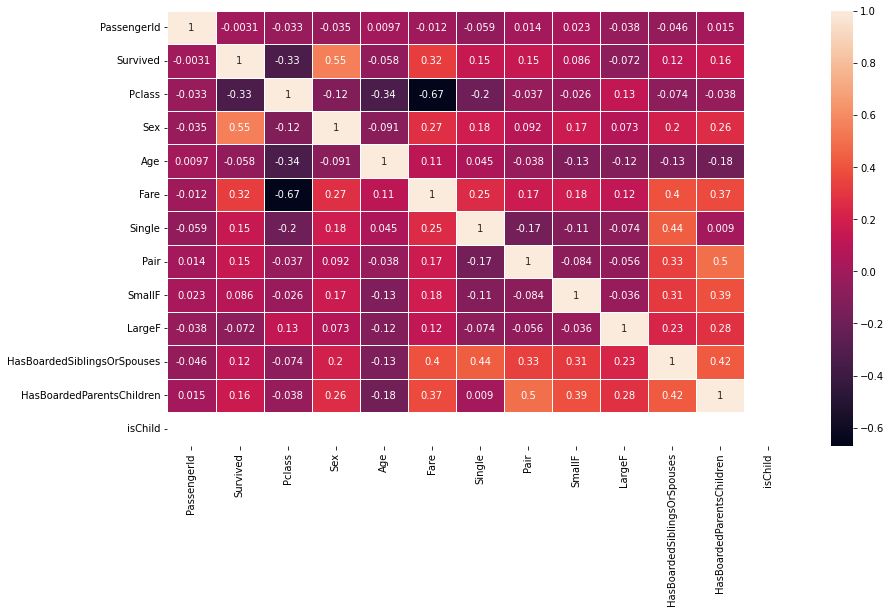

In [48]:
plt.figure(figsize = (14,8))
sns.heatmap(X_train.corr(), linewidths = 0.5, annot = True)

In [49]:
X_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Single,Pair,SmallF,LargeF,HasBoardedSiblingsOrSpouses,HasBoardedParentsChildren,isChild
PassengerId,1.000000,-0.003123,-0.033125,-0.034890,0.009746,-0.011776,-0.059125,0.013989,0.022658,-0.038477,-0.045632,0.015268,NaN
Survived,-0.003123,1.000000,-0.332026,0.553452,-0.058229,0.322943,0.147914,0.151934,0.085545,-0.071902,0.122334,0.163002,NaN
Pclass,-0.033125,-0.332026,1.000000,-0.122769,-0.341440,-0.668411,-0.196565,-0.036716,-0.026108,0.128194,-0.074457,-0.038078,NaN
Sex,-0.034890,0.553452,-0.122769,1.000000,-0.090792,0.272884,0.182724,0.092137,0.170534,0.072651,0.200830,0.257264,NaN
Age,0.009746,-0.058229,-0.341440,-0.090792,1.000000,0.110325,0.045215,-0.037998,-0.132461,-0.116754,-0.134538,-0.183362,NaN
Fare,-0.011776,0.322943,-0.668411,0.272884,0.110325,1.000000,0.254692,0.169651,0.184596,0.124553,0.395820,0.372779,NaN
Single,-0.059125,0.147914,-0.196565,0.182724,0.045215,0.254692,1.000000,-0.170070,-0.109658,-0.073592,0.439222,0.009000,NaN
Pair,0.013989,0.151934,-0.036716,0.092137,-0.037998,0.169651,-0.170070,1.000000,-0.083667,-0.056149,0.332473,0.496740,NaN
SmallF,0.022658,0.085545,-0.026108,0.170534,-0.132461,0.184596,-0.109658,-0.083667,1.000000,-0.036204,0.314597,0.388494,NaN
LargeF,-0.038477,-0.071902,0.128194,0.072651,-0.116754,0.124553,-0.073592,-0.056149,-0.036204,1.000000,0.227432,0.278562,NaN


### Visualised some of the engineered features

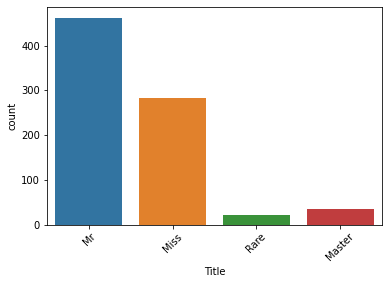

In [50]:
g = sns.countplot(x="Title",data=X_train)
g = plt.setp(g.get_xticklabels(), rotation=45) 

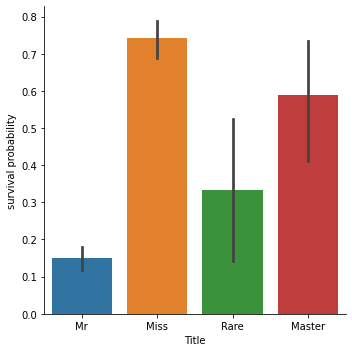

In [51]:
g = sns.catplot(data=X_train, x="Title",y="Survived",kind="bar")
g = g.set_ylabels("survival probability")

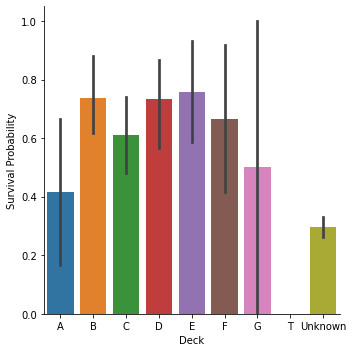

In [52]:
g = sns.catplot(data=X_train, y="Survived",x="Deck",kind="bar", order=['A','B','C','D','E','F','G','T','Unknown'])
g = g.set_ylabels("Survival Probability")

# Feature Selection

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 818 to 868
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   PassengerId                  801 non-null    int64   
 1   Survived                     801 non-null    int64   
 2   Pclass                       801 non-null    int64   
 3   Sex                          801 non-null    int64   
 4   Age                          801 non-null    float64 
 5   Fare                         801 non-null    float64 
 6   Embarked                     801 non-null    object  
 7   AgeBand                      801 non-null    category
 8   Single                       801 non-null    int64   
 9   Pair                         801 non-null    int64   
 10  SmallF                       801 non-null    int64   
 11  LargeF                       801 non-null    int64   
 12  HasBoardedSiblingsOrSpouses  801 non-null    int64   
 13  Has

In [54]:
features = ['Age', 'Pclass', 'Fare', 'Sex', 'Embarked', 'HasBoardedParentsChildren', 'HasBoardedSiblingsOrSpouses', 'Single', 'Pair', 'SmallF', 'LargeF', 'isChild', 'isSenior', 'Deck', 'Title', 'YoungAdults']

# Check different models

In [55]:
y_train = X_train.pop('Survived')

In [56]:
y_val = X_val.pop('Survived')

In [57]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('skb', SelectKBest(f_classif))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('skb', SelectKBest(chi2))])

categorical_features = X_train[features].select_dtypes(include=['object']).columns
numeric_features = X_train[features].select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [58]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier(),
    LogisticRegression()
]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])
    pipe.fit(X_train[features], y_train)   
    
    # Use validation set:
    print(classifier)
    print("model score: %.3f" % pipe.score(X_val, y_val))

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


KNeighborsClassifier(n_neighbors=3)
model score: 0.711
SVC(C=0.025, probability=True)
model score: 0.600
NuSVC(probability=True)
model score: 0.600


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


DecisionTreeClassifier()
model score: 0.756


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


RandomForestClassifier()
model score: 0.789
AdaBoostClassifier()
model score: 0.778


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


GradientBoostingClassifier()
model score: 0.800
[18:33:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model score: 0.789
LogisticRegression()
model score: 0.800


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


# Grid searching the best model

In [59]:
abc = GradientBoostingClassifier()

In [60]:
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', abc)
                          ])

In [61]:
param_grid = { 
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    'preprocessor__num__skb__k' : [4,5, 6,7,8,9,10,11,12],
    "preprocessor__cat__imputer__strategy": ["constant"],
    'preprocessor__cat__skb__k' : [6,7,8,9,10,11,12],
    'classifier__n_estimators':[10,50,100,200,400, 700,1000],
    'classifier__learning_rate':[0.001, 0.01,0.05]
}

In [62]:
# Apply GridSearchCV on our model with all parameters in params_grid
grid_search = RandomizedSearchCV(final_pipeline, param_grid, scoring='f1')

# Fit all models in the training set
grid_search.fit(X_train[features], y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler()),
                                                                                               ('skb',
                                                                                                SelectKBest())]),
                                                                               Index(['Age', 'Pclass', 'Fare', 'Sex', 'HasBoardedParentsChildren',
       'HasBoardedSiblingsOrS

In [63]:
final_model = grid_search.best_estimator_

In [64]:
print("Tuned Hyperparameters :(best parameters) ",grid_search.best_params_)
print("Best score :",grid_search.best_score_)

Tuned Hyperparameters :(best parameters)  {'preprocessor__num__skb__k': 7, 'preprocessor__num__imputer__strategy': 'mean', 'preprocessor__cat__skb__k': 9, 'preprocessor__cat__imputer__strategy': 'constant', 'classifier__n_estimators': 700, 'classifier__learning_rate': 0.01}
Best score : 0.7638926584530553


In [65]:
final_model.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_C', 'x0_Q', 'x0_S', 'x1_0', 'x2_A', 'x2_B', 'x2_C', 'x2_D',
       'x2_E', 'x2_F', 'x2_G', 'x2_T', 'x2_Unknown', 'x3_Master',
       'x3_Miss', 'x3_Mr', 'x3_Rare', 'x4_0'], dtype=object)

In [66]:
importances = final_model.named_steps['classifier'].feature_importances_


In [67]:
importances

array([1.19916229e-01, 2.08590068e-01, 6.77503929e-02, 1.81722957e-03,
       5.15625940e-03, 3.16871020e-05, 9.55717987e-03, 9.61641331e-03,
       0.00000000e+00, 4.30018853e-03, 1.58707346e-03, 2.49473293e-03,
       3.68694703e-02, 1.97927495e-02, 2.40223663e-03, 5.10118090e-01])

In [68]:
final_model.score(X_val.loc[:, features], y_val)

0.8

In [69]:
preds = final_model.predict(X_val[features])

In [70]:
print(accuracy_score(y_val,preds))
print(recall_score(y_val,preds))
print(confusion_matrix(y_val,preds))

0.8
0.5555555555555556
[[52  2]
 [16 20]]


In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_model, X_val[features], y_val, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda

0.72 accuracy with a standard deviation of 0.09


In [72]:
# Random Forest
forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Number of trees in random forest
n_estimators = [150,250,350,500,700]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [2,3,4,5,6,7,8,9]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4 , 6, 8, 10, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid
param_grid = {
                 "preprocessor__num__imputer__strategy": ["median"],
                 'preprocessor__num__skb__k' : [3,5,7,9,11,13],
                 "preprocessor__cat__imputer__strategy": ["constant"],
                 'preprocessor__cat__skb__k' : [5,7,9,11,13],
    
                 'classifier__n_estimators': n_estimators,
                 'classifier__max_features': max_features,
                 #'classifier__max_depth': max_depth,
                 #'classifier__min_samples_split': min_samples_split,
                 #'classifier__min_samples_leaf': min_samples_leaf,
                 'classifier__criterion': ['gini', 'entropy']
             }

In [73]:
# Apply GridSearchCV on our model with all parameters in params_grid
#grid_search = RandomizedSearchCV(final_pipeline, param_grid, scoring='neg_mean_squared_error')

# Fit all models in the training set
#grid_search.fit(X_train[features], y_train)


forest_grid_search = RandomizedSearchCV(forest_pipeline, param_grid, cv=10, n_iter=10, scoring='f1', refit=True, verbose=1)

# fine-tune the hyperparameters
forest_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler()),
                                                                                               ('skb',
                                                                                                SelectKBest())]),
                                                                               Index(['Age', 'Pclass', 'Fare', 'Sex', 'HasBoardedParentsChildren',
   

In [74]:
final_model_forest = forest_grid_search.best_estimator_

In [75]:
final_model_forest

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('skb',
                                                                   SelectKBest(k=3))]),
                                                  Index(['Age', 'Pclass', 'Fare', 'Sex', 'HasBoardedParentsChildren',
       'HasBoardedSiblingsOrSpouses', 'Single', 'Pair', 'SmallF', 'LargeF',
       'isChild'],
      dtype='object')),
                                                 ('cat',
                                                  P...steps=[('imputer',
                                      

In [76]:
print("Tuned Hyperparameters :(best parameters) ",forest_grid_search.best_params_)
print("Best score :",forest_grid_search.best_score_)

Tuned Hyperparameters :(best parameters)  {'preprocessor__num__skb__k': 3, 'preprocessor__num__imputer__strategy': 'median', 'preprocessor__cat__skb__k': 13, 'preprocessor__cat__imputer__strategy': 'constant', 'classifier__n_estimators': 700, 'classifier__max_features': 'log2', 'classifier__criterion': 'entropy'}
Best score : 0.7714444692314245


In [77]:
final_model_forest.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_C', 'x0_Q', 'x0_S', 'x1_0', 'x2_A', 'x2_B', 'x2_C', 'x2_D',
       'x2_E', 'x2_F', 'x2_G', 'x2_T', 'x2_Unknown', 'x3_Master',
       'x3_Miss', 'x3_Mr', 'x3_Rare', 'x4_0'], dtype=object)

In [78]:
final_model_forest.score(X_val.loc[:, features], y_val)

0.8

In [79]:
onehot_columns = list(final_model_forest.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(input_features=categorical_features))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [80]:
onehot_columns

['Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'isSenior_0',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_T',
 'Deck_Unknown',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Rare',
 'YoungAdults_0']

In [81]:
preds = final_model_forest.predict(X_val[features])

In [82]:
print(accuracy_score(y_val,preds))
print(recall_score(y_val,preds))
print(confusion_matrix(y_val,preds))

0.8
0.5833333333333334
[[51  3]
 [15 21]]


In [83]:
scores = cross_val_score(final_model, X_val[features], y_val, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda

0.72 accuracy with a standard deviation of 0.09


In [84]:
importances = final_model_forest.named_steps['classifier'].feature_importances_
importances

array([0.09444026, 0.43898931, 0.10453277, 0.01883885, 0.01997084,
       0.00878934, 0.00999728, 0.00893555, 0.01037102, 0.00428423,
       0.0019164 , 0.00070554, 0.03907958, 0.02325655, 0.08520149,
       0.13069101])

# Predictions

In [85]:
df_test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,AgeBand,Single,Pair,SmallF,LargeF,HasBoardedSiblingsOrSpouses,HasBoardedParentsChildren,isChild,YoungAdults,isSenior,Deck,Title
PassengerId,,,,,,,,,,,,,,,,,,
892,892,3,0,0.872163,-0.806856,Q,"(30.502, 45.668]",0,0,0,0,0,0,1,0,0,Unknown,Mr
893,893,3,1,0.872163,-0.909806,S,"(45.668, 60.834]",1,0,0,0,1,0,1,0,0,Unknown,Miss
894,894,2,0,2.104267,-0.607465,Q,"(60.834, 76.0]",0,0,0,0,0,0,1,0,0,Unknown,Mr
895,895,3,0,-0.359940,-0.712711,S,"(15.336, 30.502]",0,0,0,0,0,0,1,0,0,Unknown,Mr
896,896,3,1,-0.359940,-0.380162,S,"(15.336, 30.502]",0,1,0,0,1,1,1,0,0,Unknown,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1305,3,0,-0.359940,-0.781072,S,"(15.336, 30.502]",0,0,0,0,0,0,1,0,0,Unknown,Mr
1306,1306,1,1,0.872163,1.825283,C,"(30.502, 45.668]",0,0,0,0,0,0,1,0,0,C,Rare
1307,1307,3,0,0.872163,-0.877685,S,"(30.502, 45.668]",0,0,0,0,0,0,1,0,0,Unknown,Mr


In [86]:
#y_pred = final_model_forest.predict(df_test[features])
y_pred = final_model.predict(df_test[features])

len(df_test)
len(y_pred)

418

In [87]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Create CSV

In [88]:
my_submission = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [89]:
my_submission

,PassengerId,Survived
PassengerId,,
892,892,0
893,893,1
894,894,0
895,895,0
896,896,1
...,...,...
1305,1305,0
1306,1306,1
1307,1307,0
